<a href="https://colab.research.google.com/github/anjanasuresh14/INTRODUCTION-TO-PYTHON/blob/main/Python23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data=files.upload()

Saving titanic.csv to titanic.csv


In [2]:
import pandas as pd
dataframe=pd.read_csv('titanic.csv')

In [3]:
dataframe.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Survived
0,1,3,1,34.5,1,0,0
1,2,1,0,47.0,1,0,1
2,3,3,0,62.0,0,0,1
3,4,1,0,27.0,1,0,1
4,5,3,1,22.0,0,0,0


In [5]:
x=dataframe.drop('Survived',1)
y=dataframe.Survived

<ipython-input-5-ef72e68a3712>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=dataframe.drop('Survived',1)


In [6]:
print(x)

     PassengerId  Pclass  Sex   Age  SibSp  Parch
0              1       3    1  34.5      1      0
1              2       1    0  47.0      1      0
2              3       3    0  62.0      0      0
3              4       1    0  27.0      1      0
4              5       3    1  22.0      0      0
..           ...     ...  ...   ...    ...    ...
886          887       2    1  34.0      0      0
887          888       1    0   5.0      0      0
888          889       3    0  52.0      1      2
889          890       1    1  36.0      0      0
890          891       3    1   4.0      0      0

[891 rows x 6 columns]


In [7]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=8)

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree=tree.fit(X_train,y_train)
predictedy=tree.predict(X_test)
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,predictedy)
print(accuracy)

0.6902985074626866


In [10]:
from sklearn.tree import export_graphviz
from io import StringIO

In [11]:
dotdata=StringIO()
export_graphviz(tree,out_file=dotdata,filled=True,rounded=True,special_characters=True,class_names=['0','1'])
print(dotdata.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<X<SUB>2</SUB> &le; 0.5<br/>gini = 0.475<br/>samples = 623<br/>value = [381, 242]<br/>class = 0>, fillcolor="#f6d1b7"] ;
1 [label=<X<SUB>1</SUB> &le; 2.5<br/>gini = 0.376<br/>samples = 227<br/>value = [57, 170]<br/>class = 1>, fillcolor="#7bbeee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<X<SUB>3</SUB> &le; 0.415<br/>gini = 0.09<br/>samples = 127<br/>value = [6, 121]<br/>class = 1>, fillcolor="#43a2e6"] ;
1 -> 2 ;
3 [label=<X<SUB>0</SUB> &le; 294.5<br/>gini = 0.355<br/>samples = 13<br/>value = [3, 10]<br/>class = 1>, fillcolor="#74baed"] ;
2 -> 3 ;
4 [label=<X<SUB>0</SUB> &le; 206.0<br/>gini = 0.219<br/>samples = 8<br/>value = [1, 7]<br/>class = 1>, fillcolor="#55abe9"] ;
3 -> 4 ;
5 [label=<X<SUB>0</SUB> &le; 167.0<br/>gini = 0.375<br/>samples = 4<br/>value = [1, 3]<br/>class = 1>, fillcolor="#7bbeee"] ;
4 -> 5 ;
6 [label

In [12]:
import pydotplus
graph=pydotplus.graph_from_dot_data(dotdata.getvalue())
graph.write_png('tree_for_titanic.png')

True

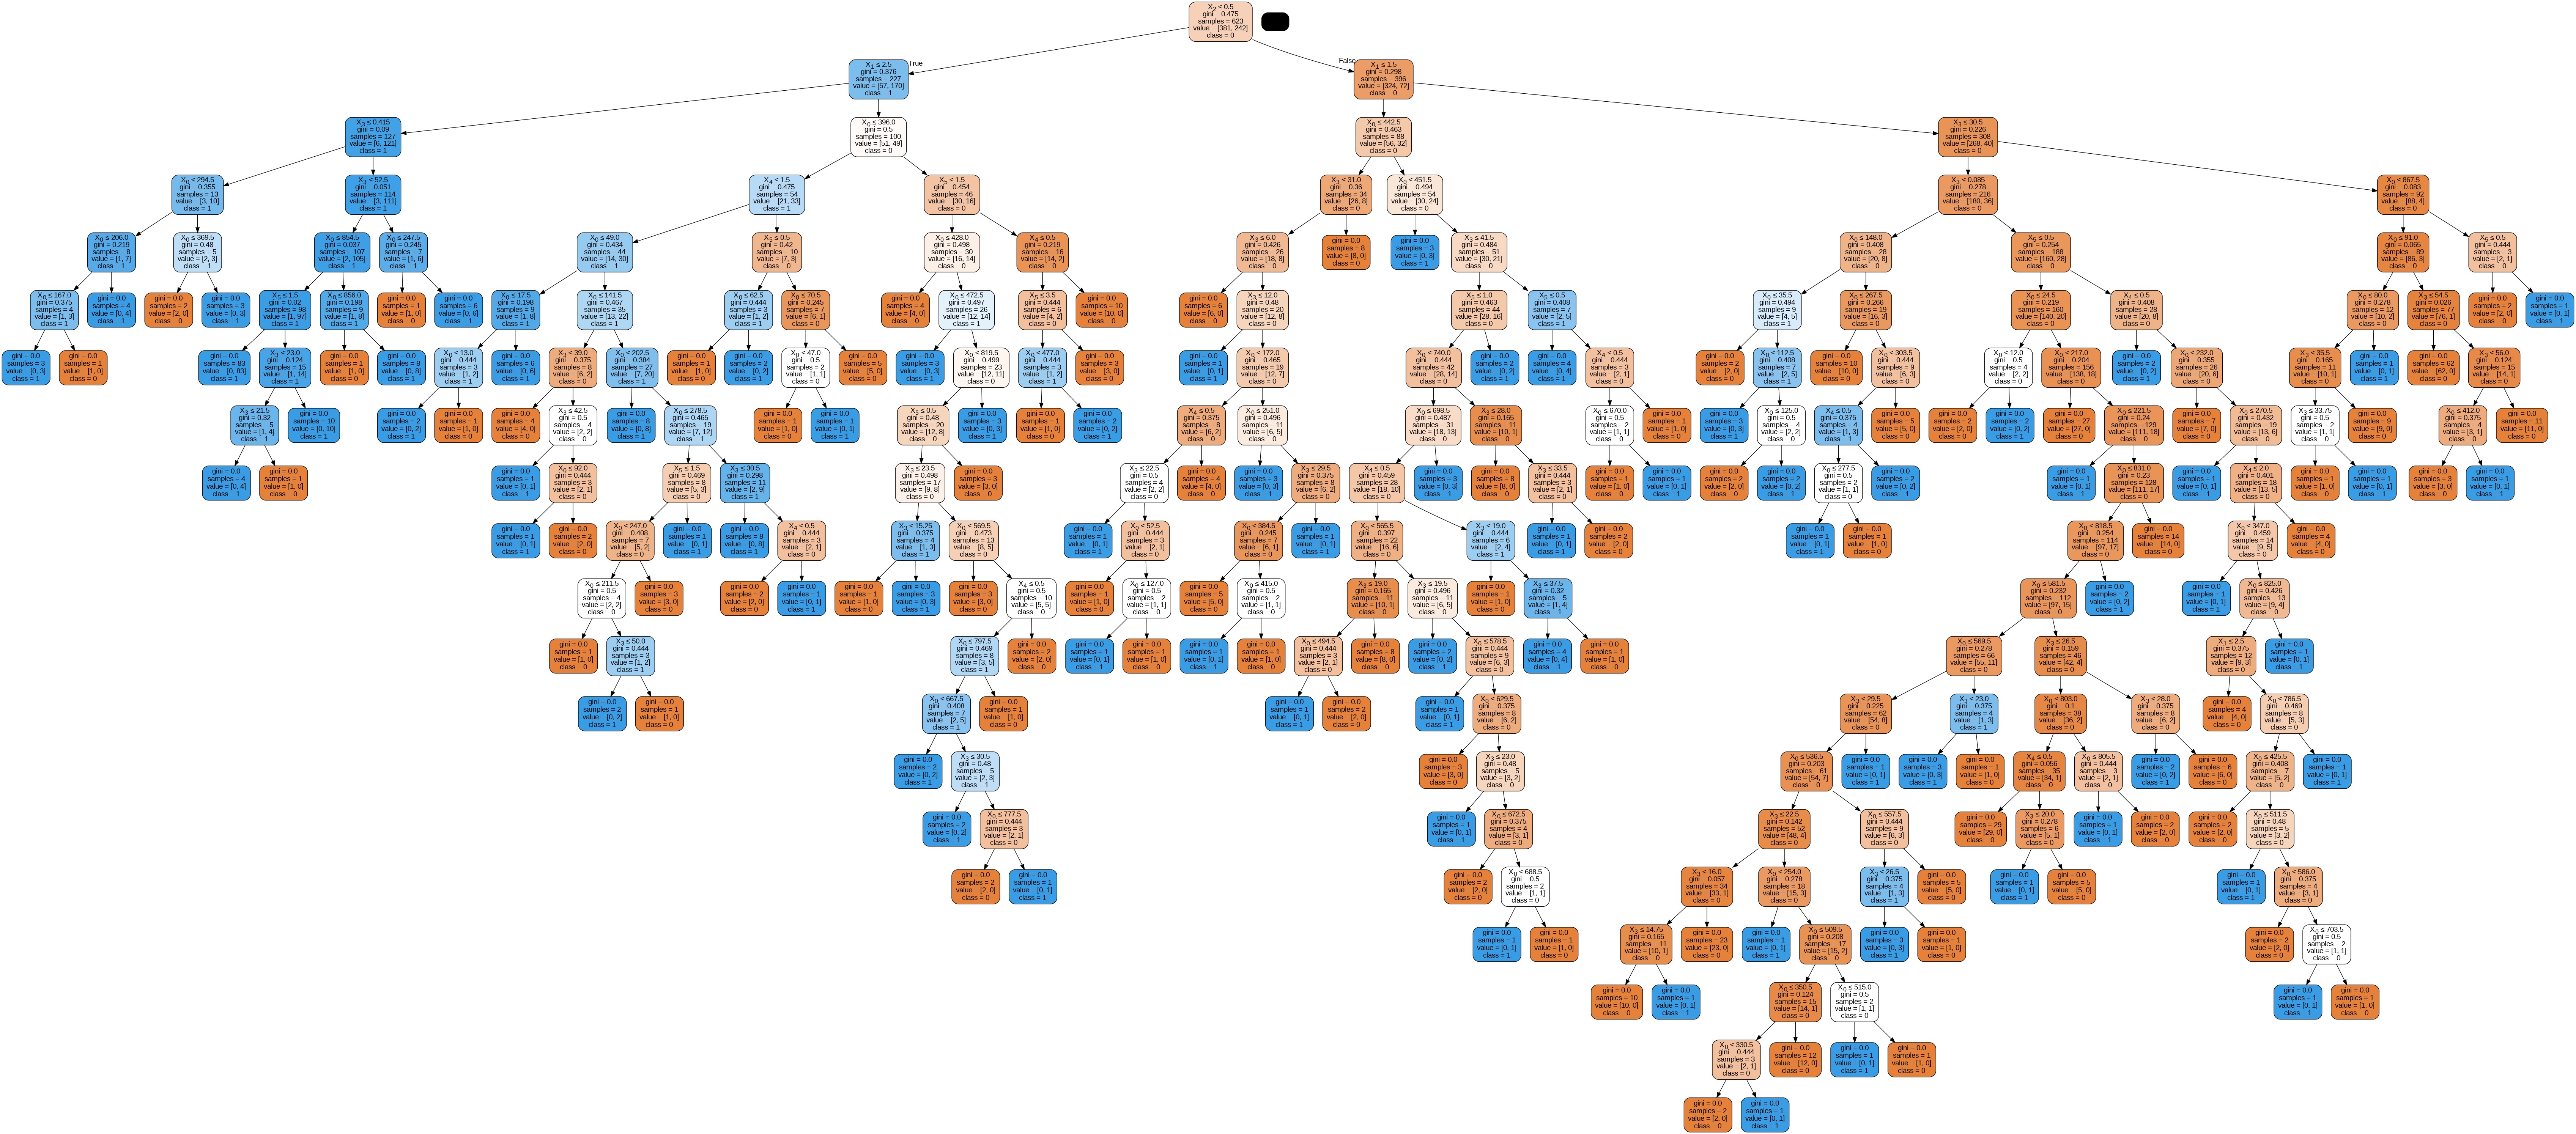

In [13]:
from IPython.display import Image
Image(graph.create_png())